In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files
import plotly.express as px
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving delhiaqi.csv to delhiaqi.csv


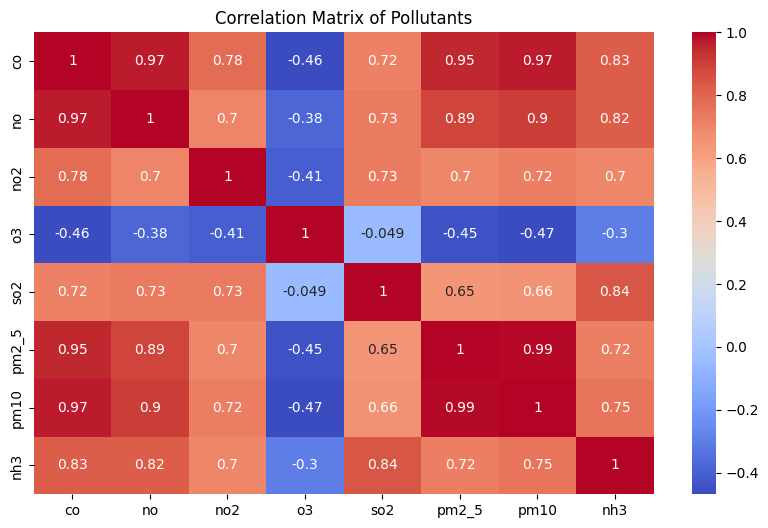

In [2]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df.fillna(df.mean(numeric_only=True), inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df[['co','no','no2','o3','so2','pm2_5','pm10','nh3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Pollutants")
plt.show()

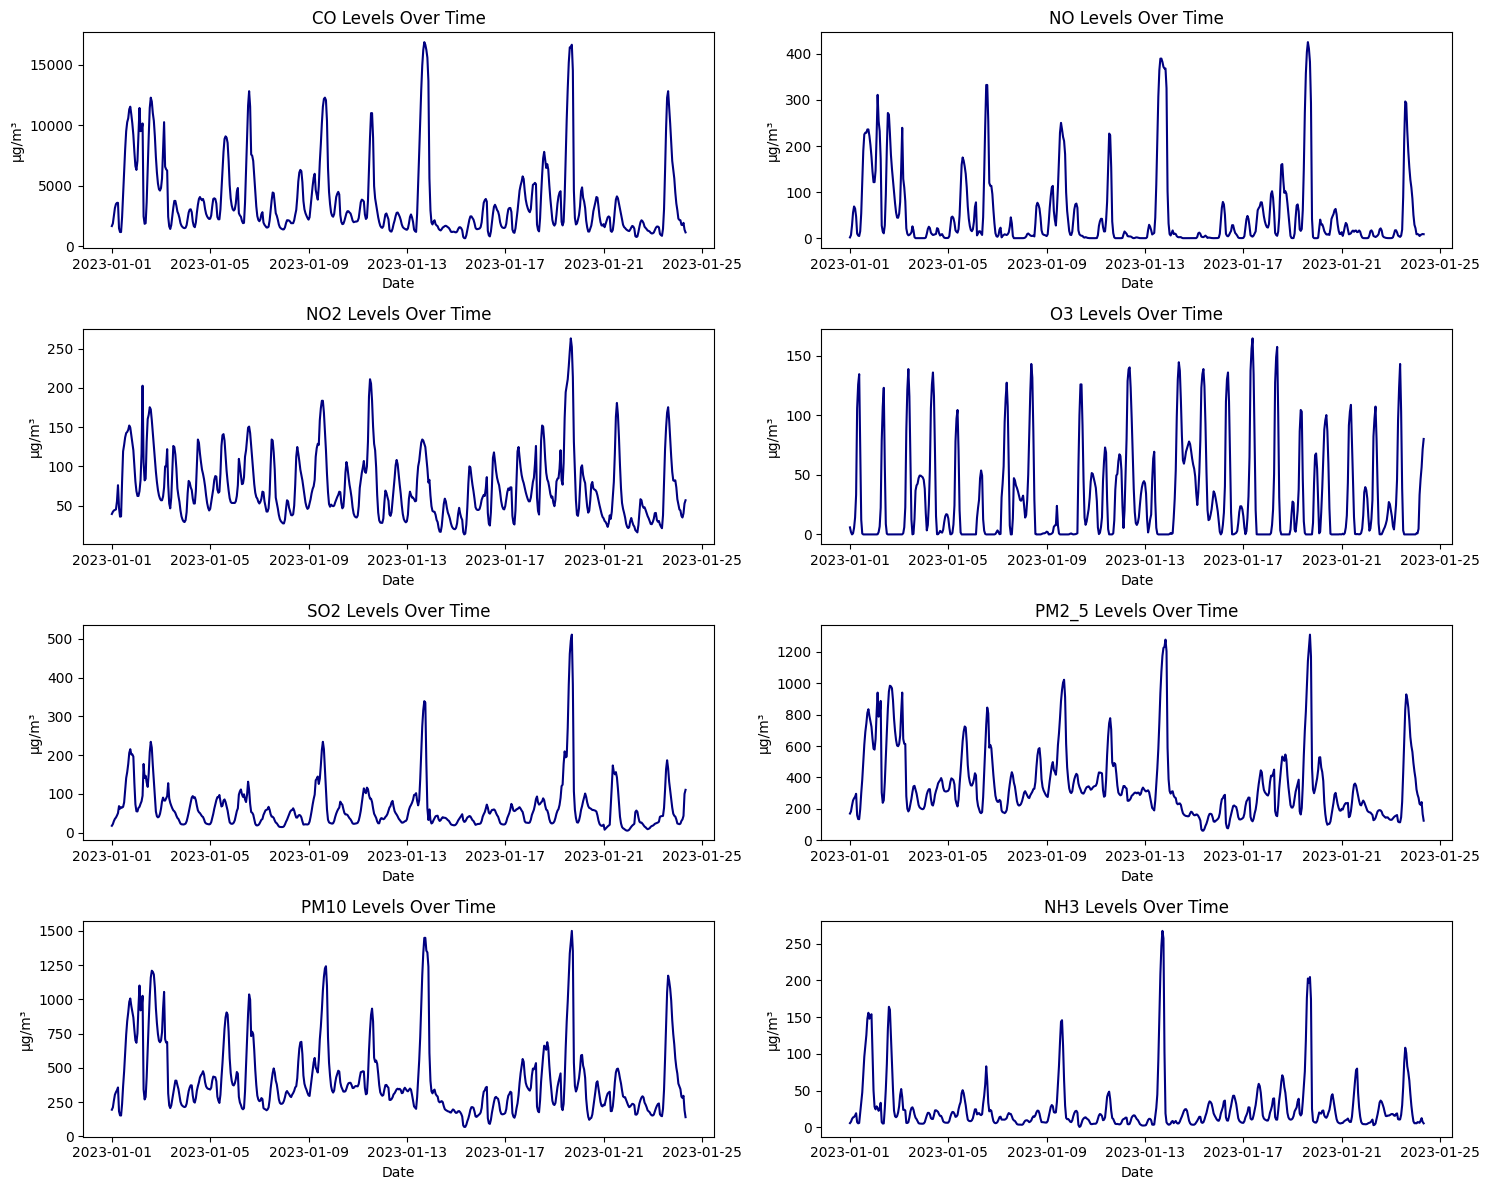

/tmp/ipython-input-6-1603465467.py:24: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


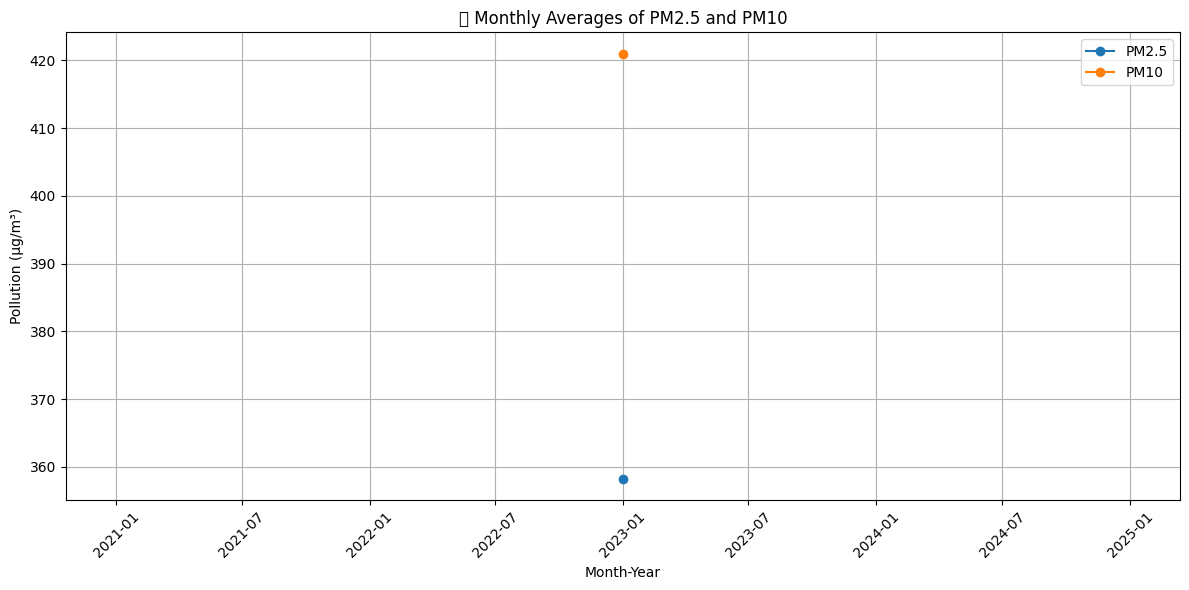

In [6]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plt.figure(figsize=(15, 12))
for i, col in enumerate(pollutants):
    plt.subplot(4, 2, i+1)
    plt.plot(df['date'], df[col], color='navy')
    plt.title(f'{col.upper()} Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel('µg/m³')
    plt.tight_layout()
plt.show()
monthly_avg = df.groupby(['year', 'month'])[pollutants].mean().reset_index()
monthly_avg['month_year'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))
monthly_avg = df.groupby(['year', 'month'])[['pm2_5', 'pm10']].mean().reset_index()
monthly_avg['month_year'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['month_year'], monthly_avg['pm2_5'], label='PM2.5', marker='o')
plt.plot(monthly_avg['month_year'], monthly_avg['pm10'], label='PM10', marker='o')
plt.title("📅 Monthly Averages of PM2.5 and PM10")
plt.xlabel("Month-Year")
plt.ylabel("Pollution (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4-1241707657.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pm2_5_level', data=df, order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], palette='Spectral')


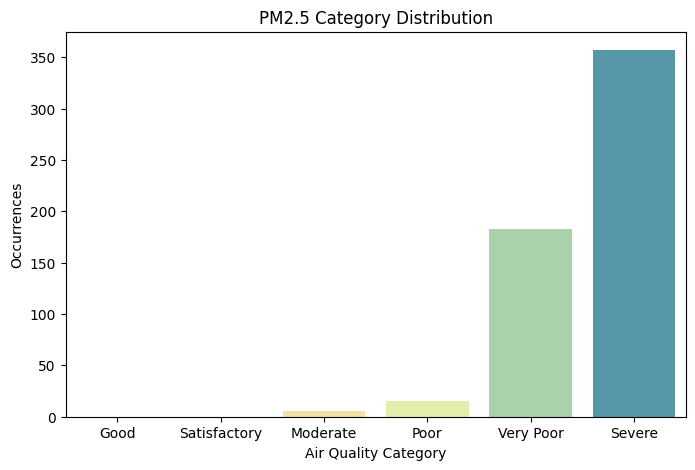

Insights & Recommendations:


• Highest pollution levels observed in winter months due to low wind speed and inversion layers.
• PM2.5 and PM10 concentrations consistently exceed safe limits.
• Significant correlations observed between NO₂ and other traffic-related gases.

✅ Suggestions:
- Introduce or expand congestion charges, promote electric buses.
- Enforce stricter emissions norms for industries.
- Awareness campaigns: mask use, minimize outdoor activity on high AQI days.



In [4]:
def classify_pm25(value):
    if value <= 30:
        return 'Good'
    elif value <= 60:
        return 'Satisfactory'
    elif value <= 90:
        return 'Moderate'
    elif value <= 120:
        return 'Poor'
    elif value <= 250:
        return 'Very Poor'
    else:
        return 'Severe'

df['pm2_5_level'] = df['pm2_5'].apply(classify_pm25)

plt.figure(figsize=(8, 5))
sns.countplot(x='pm2_5_level', data=df, order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], palette='Spectral')
plt.title("PM2.5 Category Distribution")
plt.ylabel("Occurrences")
plt.xlabel("Air Quality Category")
plt.show()
print("Insights & Recommendations:\n")
print("""
• Highest pollution levels observed in winter months due to low wind speed and inversion layers.
• PM2.5 and PM10 concentrations consistently exceed safe limits.
• Significant correlations observed between NO₂ and other traffic-related gases.

✅ Suggestions:
- Introduce or expand congestion charges, promote electric buses.
- Enforce stricter emissions norms for industries.
- Awareness campaigns: mask use, minimize outdoor activity on high AQI days.
""")

🟥 Most Polluted Day:
📅 Date: 2023-01-02
☠️  Pollution Score: 1195.69 (average of all pollutants)


/tmp/ipython-input-5-1411688695.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


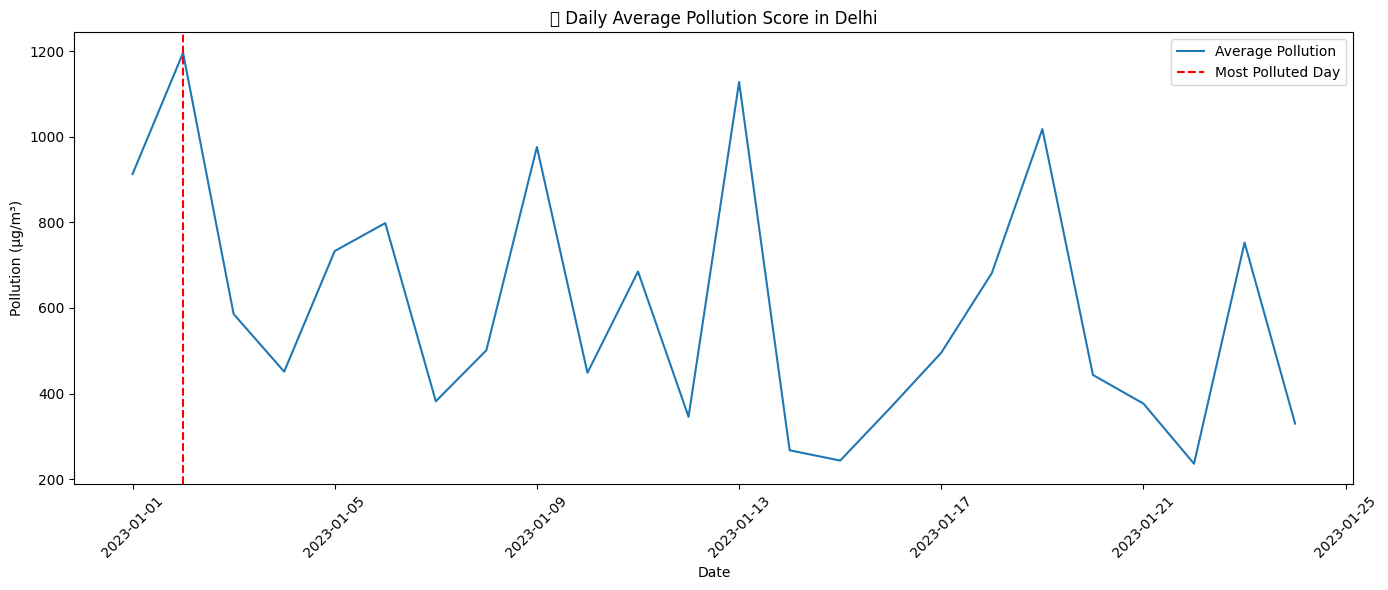

In [5]:
df['pollution'] = df[pollutants].mean(axis=1)
df['day_only'] = pd.to_datetime(df['date']).dt.date
daily_pollution = df.groupby('day_only')['pollution'].mean().reset_index()
most_polluted = daily_pollution.loc[daily_pollution['pollution'].idxmax()]
print("🟥 Most Polluted Day:")
print(f"📅 Date: {most_polluted['day_only']}")
print(f"☠️  Pollution Score: {most_polluted['pollution']:.2f} (average of all pollutants)")
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_pollution, x='day_only', y='pollution', label='Average Pollution')
plt.axvline(pd.to_datetime(most_polluted['day_only']), color='red', linestyle='--', label='Most Polluted Day')
plt.title("📈 Daily Average Pollution Score in Delhi")
plt.xlabel("Date")
plt.ylabel("Pollution (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()